# Time Dependent Quantum Mechanics

In Lecture 10, we developed some solutions for the stationary Schrödinger equation. We solved the harmonic oscillator or the particle in a box model. All of this did not give any dynamics of particles in potentials but rather a static picture. Today we would like to consider the time dependent Schrödinger equations which yields the dynamics of the system. We will develop a solution based on Fourier transforms, as we still have to practice that a bit.

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import *
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
from scipy.fftpack import fft,ifft
from time import sleep,time

from ipycanvas import MultiCanvas, hold_canvas,Canvas


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 16,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Time dependent Schrödinger equation

The time dependent Schrödinger equation is given by 

\begin{equation}
-i\hbar\frac{\partial \Psi}{\partial t}=-\frac{\hbar^2}{2m}\nabla^2 \Psi + V(x)\Psi
\end{equation}

in 3 dimensions. We have already shortly mentioned this equation in 1 dimension

\begin{equation}
-i\hbar\frac{\partial \Psi(x,t)}{\partial t} = \left ( \frac{-\hbar^2 }{2m}\frac{\partial^2}{\partial x^2}+V(x,t) \right ) \Psi(x,t)
\end{equation}

during the last lecture. We are using the 1-dimensional equation today again to study the tunneling of a wavepacket.

## Wave Packets

The following plots show the composition of wavepackets as a superposition of multiple waves with different k-vectors. It also compares the wavepacket propagation for matter waves and light waves.

A wavepacket can be constructed from a superposition of plane waves with different wavenumber $k$ or different frequency $\omega$. We write down examples only for the wavenumber, but equivalently, they may be developed for the frequency as well. 

\begin{equation}
\psi(x)=A\int\limits_{+\infty}^{-\infty}\phi(k)e^{ikx}e^{-i\omega t}dk
\end{equation}

The function $\phi(k)$ gives the amplitude of the wavefunction with the value $k$ in the wavepacket. If for example only one wave at $k_0$ is contributing to the wavepacket, then the function $\phi(k_0)=1$ but for all other $k$ this function is zero. Therefore the integral results only in a single plane wave.

If the distribution of amplitudes $\phi(k)$ extends over a larger region, i.e. from $k_{0}-\Delta k/2$ to $k_{0}+\Delta k/2$, the wavepacket is more complex. For matter waves we have to take into account that $\omega$ is a function of the wavevector as well.

\begin{equation}
\omega=\frac{\hbar k^{2}}{2m}
\end{equation}

To calculate the shape of the wavepacket we approximate the above dispersion relation by

\begin{equation}
\omega=\omega_0+\frac{\partial \omega}{\partial k}(k-k_{0})
\end{equation}

which replaces the above dispersion relation by an approximate linear one. 

As a final result we obtain the wavepacket 

\begin{equation}
\psi(x,t)=2A\frac{\sin\left(x-\frac{\partial \omega}{\partial k}t\right)\frac{\Delta k}{2}}{x-\frac{\partial \omega}{\partial k}t}e^{i(k_0x-\omega_0 t)}
\end{equation}

Obviously the wavepacket has an underlying plane wave which is the rightmost exponential factor. The fator in front of the plane wave defines the envelope of the wavepacket. The envelope appears through the superposition of all plane waves. It propagates with the group velocity $v_{g}=\partial \omega/\partial k$, while the plane wave propagates with the phase velocity $v_{ph}=\omega_{0}/k_0$, which can be different than the group velocity. 



The superposition of such plane waves resulting in wave packets as demonstrated with the functions 

~~~
def matter_wave_packet(x,t):

def gauss_wave_packet(x,t):

~~~

**matter_wave_packet** reveals a wave packet for electrons at a wavelength of 1 Angstrom and a finite with constant amplitude distribution for the plane waves.

**gauss_wave_packet** reveals a matter wave packet for electrons at a wavelength of 1 Angstrom and a gaussian amplitude distribution for the plane waves. 


In [130]:
wavelength=1e-10 # wavelenth of the matter wave in Angstroem
k0=2*np.pi/wavelength # wavevector of the matter wave
dk=k0/20 # intervall of the matter wave 

## Demonstration of superposition of plane waves

The code below just shows how waves of different wave vector can be combined to result in a wave packet, i.e. n object that is localized in space. This is nothing else then a Fourier decomposition of a spatially localized object.

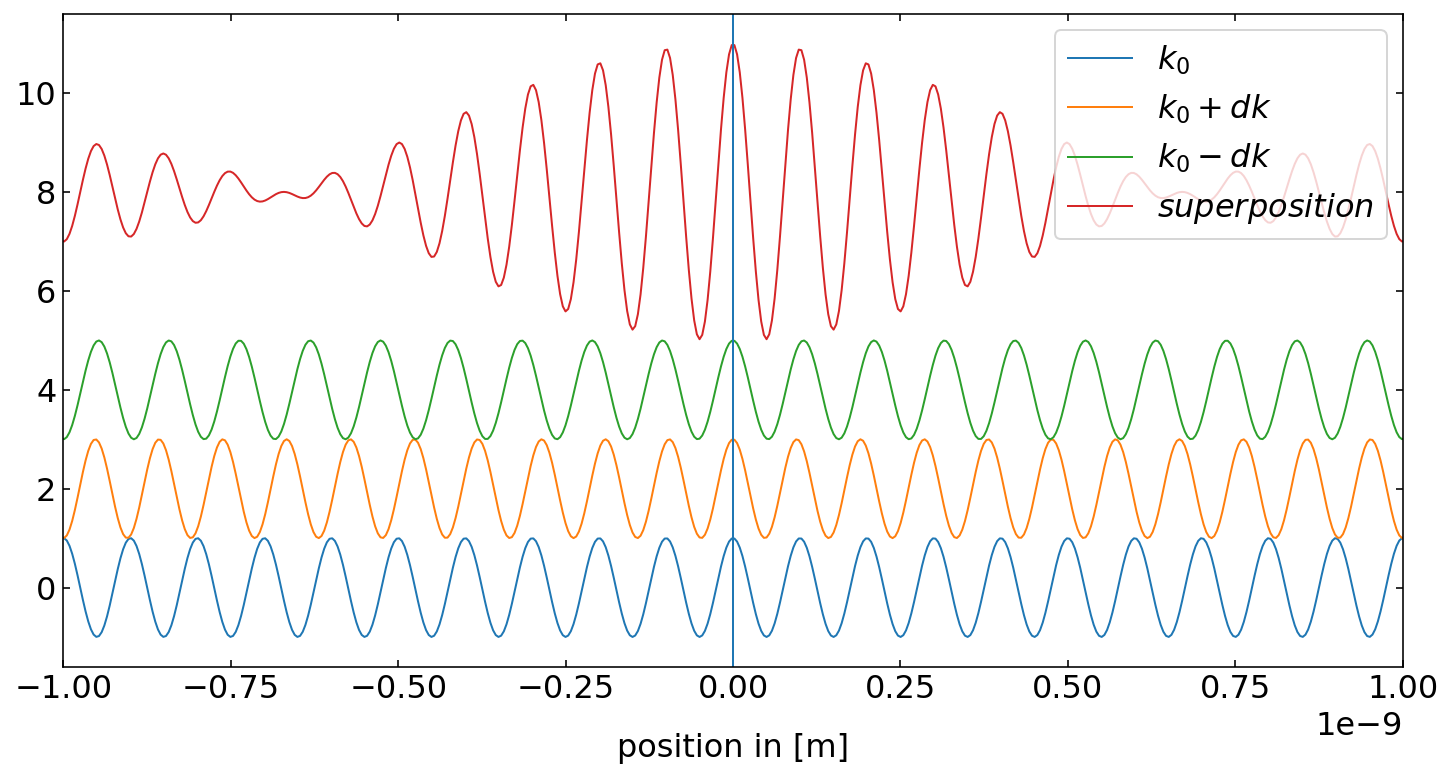

In [131]:
plt.figure(figsize=(12,6))

x=np.linspace(-2e-9,2e-9,1000)
k=k0
t=0
frequency=hbar*k**2/(2*electron_mass)
h=np.exp(1j*(k*x-frequency*t))
a=np.copy(h)

plt.plot(x,np.real(h),label='$k_0$')

k=k0+dk
frequency=hbar*k**2/(2*electron_mass)
h=np.exp(1j*(k*x-frequency*t))
a+=h
plt.plot(x,np.real(h)+2,label='$k_0+dk$')

k=k0-dk
frequency=hbar*k**2/(2*electron_mass)
h=np.exp(1j*(k*x-frequency*t))
a+=h
plt.plot(x,np.real(h)+4,label='$k_0-dk$')


plt.plot(x,np.real(a)+8,label='$superposition$')
plt.axvline(x=0)
plt.legend(loc='upper right')
plt.xlim(-1e-9,1e-9)
plt.xlabel('position in [m]')
plt.show()

### Definition of the wave packet functions


In [251]:
# matter wave packet with a frequency that scales with the square of the wave vector
def matter_wave_packet(x,t):
    h=0
    N=100
    for k in np.linspace(k0-dk,k0+dk,N):
        frequency=hbar*k**2/(2*electron_mass)
        h+=np.exp(1j*(k*x-frequency*t))/N        
                
    return(h)


def gauss_wave_packet(x,t):
    h=0
    for k in np.linspace(k0-dk,k0+dk,1000):
        frequency=hbar*k**2/(2*electron_mass)
        sigma=np.sqrt(2)*0.2*dk
        h+=np.exp(-((k-k0)/sigma)**2)*np.exp(1j*(k*x-frequency*t))        
    return(h)


### Matter wavepacket with equal amplitude of components

The wavepacket below consists of different k-vectors, whereby each k-vector component has a constant amplitude.

In [252]:
fig = plt.figure(1,figsize=(12,6))

x=np.linspace(-5e-9,5e-9,2000)
#plt.plot(x,np.real(matter_wave_packet(x,0e-16/2)))
plt.plot(x,np.abs(matter_wave_packet(x,0e-16/2))**2)
plt.xlabel(r'position [m]',fontsize=16)
plt.ylabel(r'amplitude',fontsize=16)
#plt.tick_params(labelsize=10)
plt.show()

### Gaussian Wave Packet

We next create a Gaussian wave packet, which means that the interfering plane waves follow a Gaussian distribution.  

In [253]:
fig = plt.figure(1,figsize=(12,6))

x=np.linspace(-10e-9,10e-9,10000)
plt.plot(x,np.real(gauss_wave_packet(x,0e-16/2)))
plt.plot(x,np.abs(gauss_wave_packet(x,0e-16/2)))
plt.xlabel(r'x-position, $m$',fontsize=16)
plt.ylabel(r'amplitude',fontsize=16)

plt.show()

## Time evolution of a Gaussian Wavepacket

We would like to plot in also in the next sections the time evolution of the wavefunction. Of course we want to see the function developing live over time in a nice diagram. 
We could use the `matplotlib` `animate` method. But we try to do that with a different trick. We use `matplotlib` to generate the plot. We store that in an numpy array, which we then show with the help of our `ipycanvas` module.

In [289]:
## setup the canvas
canvas = Canvas(width=800, height=200,sync_image_data=False)
display(canvas)

Canvas(height=200, width=800)

The next lines do the magic here. You see that there is essentially a normal `matplotlib` plotting in the first lines. The special lines are 

~~~
plt.draw()
background = fig.canvas.copy_from_bbox(ax.bbox)
points=ax.plot(x*1e9,np.abs(gauss_wave_packet(x,t))**2)[0]
plt.close() 
~~~

which draws the diagram without the data into the buffer. We store that buffer as the background  with `fig.canvas.copy_from_bbox(ax.bbox)`, because it is everytime the same. The third line obtains the data point list as a matplotlib object. 
This list can be later updated with new data for the animation. Finally, we close the figure with `plt.close()` to prevent extra drawing below the cell. 

In [290]:
x=np.linspace(0,20e-9,100)

fig, ax = plt.subplots(1,1,figsize=(10,3))
plt.xlim(0,20)
plt.ylim(0,100000)

plt.xlabel('x [nm]')
plt.ylabel(r'$\Psi(x,t)$')
plt.tight_layout()  


plt.draw()
background = fig.canvas.copy_from_bbox(ax.bbox)
points=ax.plot(x*1e9,np.abs(gauss_wave_packet(x,t))**2)[0]
plt.close() 




The animation is then done by a for loop through time calculating the new wavefunction data and supplying it to the `points` object as new data. In detail it looks this way.

In [292]:
for t in np.linspace(0,2e-15,100):
    fig.canvas.restore_region(background) ## restore the background we have saved before
    ax.draw_artist(points) ## draw the plot with the data points
    points.set_data(x*1e9,np.abs(gauss_wave_packet(x,t))**2) ## modify the data in the points object with the new coordinates coming from the wavefunction
    
    fig.canvas.blit(ax.bbox) ## copy everything into the figure canvas
    
    X = np.array(fig.canvas.renderer.buffer_rgba()) ## obtain the image representing the plot as a color image with red, green, blue and alpha pixel values
   
    ## this is now our previous ipycanvas image drawing 
    with hold_canvas(canvas): 
        canvas.clear()
        canvas.put_image_data(X)
        sleep(0.02)